## Aprendizagem Supervisionada

#### Conceito

 > Tipo de `aprendizagem de máquina` formado por algoritmos que simulam aprendizado com dados previamente rotulados. De modo iterativo, cada amostra é apresentada ao algoritmo e o mesmo gera como saída um possível rótulo para a amostra. O rótulo predito é comparado com o rótulo real e caso o algoritmo erre, um ajuste é feito para que a saída predita se aproxime ao máximo da saída real.


#### Rótulo:
- **Discreto:** Classificação
- **Contínuo:** Regressão

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/df1dafe9-7c7e-4dec-a8fe-13cff93ab684.png" width=400>

#### Ex.: Temperatura de um ambiente

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/788cdc1b-20df-407a-82f3-776de685628e.jpg" width="400">    

### Features - Características dos dados

 - Desempenho → Métrica 
 - Treinamento e teste → Experiência
     - **Features**: Características do objeto alvo da análise
     - **Target**: Classe ou valor do objeto

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/39eea9b9-6906-42e0-9ef1-e7aee4293aa3.jpg" width=700>

### Construção de um modelo de machine learning

**Passo 1**: Formulação de hipótese
 - Disponibilidade dos dados
 - Padrão nos dados
 - Oportunidade de negócio
 - Viabilidade do modelo
 - EDA
    

**Passo 02**: Construção do experimento
 - **Coleta de dados**
  - Técnicas de amostragem 
 - Pré-processamento dos dados
 - Definição de métricas
 - Seleção de modelo(s)
     - Modelo paramétrico ou não paramétrico?
     - Conjunto de parâmetros
     - Conjunto de hiperparâmetros
        

**Passo 03**: Construção do modelo
 - Escolha de ferramentas
 - Ambiente de execução
 - Forma de monitoramento do treinamento


**Passo 04**: Avaliação dos resultados
 - Teste
 - Comparativo
 - **Monitoramento**
     - Métricas de monitoramento
     - Drift

## Desenvolvimento de um modelo

#### 1. Classificação

In [3]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/37621853-e789-4ccd-aff2-4f3078556cfb.jpg" width=300>

In [4]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

#### Lista de features

In [5]:
data.feature_names.tolist()

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

#### Quantas features?

In [6]:
len(data.feature_names.tolist())

30

In [7]:
df_features = pd.DataFrame(data = data.data, columns = data.feature_names)
df_features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
 data.target.ndim

1

In [10]:
df_target = pd.DataFrame(data = data.target, columns=['diagnosis'])
df_target

,diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [11]:
df_target.value_counts(normalize=True)

diagnosis
1            0.627417
0            0.372583
dtype: float64

#### Divisão de treino e teste

In [12]:
#features
X = df_features
#label
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Regressão Logística

<img src="https://www.saedsayad.com/images/LogReg_1.png">

#### Criar e treinar o modelo de regressão logística
Intuição

<img src = "https://s3-sa-east-1.amazonaws.com/lcpi/b92ec6a5-91b2-45f5-ad65-75978d6f54cc.png" width=400>

#### Construção do modelo

In [13]:
model = LogisticRegression(max_iter=1_000_000)

### Treinamento do modelo

In [14]:
model.fit(X_train, y_train)

C:\Users\ProDigital\anaconda3\envs\machine\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000000)

#### Testar o modelo

In [15]:
y_pred = model.predict(X_test)

In [16]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

#### Acurácia (Accuracy)

In [17]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [18]:
y_test

,diagnosis
204,1
70,0
131,0
431,1
540,1
...,...
69,1
542,1
176,1
501,0


In [19]:
acc = accuracy_score(y_test, y_pred)
acc

0.9707602339181286

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/8aa5276a-ef3e-4529-aaec-d13944de905d.png" width=300>

 - VP = Verdadeiro Positivo
 - VN = Verdadeiro Negativo
 - FP = Falso Positivo
 - FN = Falso Negativo

In [20]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[ 60,   3],
       [  2, 106]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predito')

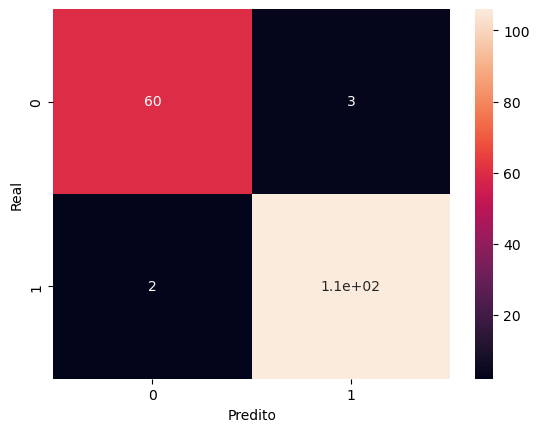

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(matrix, annot=True)
plt.ylabel('Real')
plt.xlabel('Predito')

<img src="https://media.licdn.com/dms/image/C4E12AQEr83oq0FX3gA/article-inline_image-shrink_400_744/0/1545440533552?e=1717632000&v=beta&t=bMJUzxMPr07u3rg_VvooDO3GykbNGGM9nQdvX9e3xmw" width=800px />

### Probabilidades

<img src = "https://s3-sa-east-1.amazonaws.com/lcpi/b92ec6a5-91b2-45f5-ad65-75978d6f54cc.png" width=400>

In [22]:
y_proba = model.predict_proba(X_test)
y_proba

array([[1.43424891e-01, 8.56575109e-01],
       [9.99999956e-01, 4.43264357e-08],
       [9.98081787e-01, 1.91821307e-03],
       [1.47822034e-03, 9.98521780e-01],
       [2.78503472e-04, 9.99721497e-01],
       [1.00000000e+00, 2.53619356e-10],
       [1.00000000e+00, 5.50033208e-11],
       [9.81057079e-01, 1.89429214e-02],
       [1.76630105e-02, 9.82336990e-01],
       [6.70472240e-03, 9.93295278e-01],
       [7.86293832e-02, 9.21370617e-01],
       [9.99296746e-01, 7.03254473e-04],
       [1.20971059e-02, 9.87902894e-01],
       [9.24685979e-01, 7.53140211e-02],
       [1.12358319e-03, 9.98876417e-01],
       [9.97425738e-01, 2.57426221e-03],
       [1.63976808e-03, 9.98360232e-01],
       [1.95919232e-05, 9.99980408e-01],
       [8.39642017e-07, 9.99999160e-01],
       [9.99999192e-01, 8.07775501e-07],
       [2.03939726e-01, 7.96060274e-01],
       [1.13031248e-02, 9.88696875e-01],
       [9.99999983e-01, 1.68612485e-08],
       [4.38765020e-04, 9.99561235e-01],
       [4.022034

#### 2. Regressão

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#### Regressão Linear

<img src = "https://s3-sa-east-1.amazonaws.com/lcpi/a272534b-ac56-4c2e-be0b-3ea95ada54dc.gif">

#### Divisão de treino e teste

In [24]:
data = {
    'idade': [18, 23, 28, 33, 38, 43, 48, 53, 58, 63],
    'custo': [871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090]
}

df = pd.DataFrame(data)
df

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [25]:
#features
X = df[['idade']]

#label
y = df['custo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
type(df[['idade']])

pandas.core.frame.DataFrame

#### Construção do modelo

In [27]:
model = LinearRegression()

#### Treinamento do modelo

In [28]:
model.fit(X_train, y_train)

LinearRegression()

#### Predição

In [29]:
y_pred = model.predict(X_test)
y_pred

array([3040.18103448,  777.06896552])

In [30]:
X_test

,idade
8,58
1,23


In [31]:
y_test

8    3066
1    1132
Name: custo, dtype: int64

In [32]:
y_pred

array([3040.18103448,  777.06896552])

#### Avaliação

In [33]:
mae = mean_absolute_error(y_test, y_pred)
mae

190.375

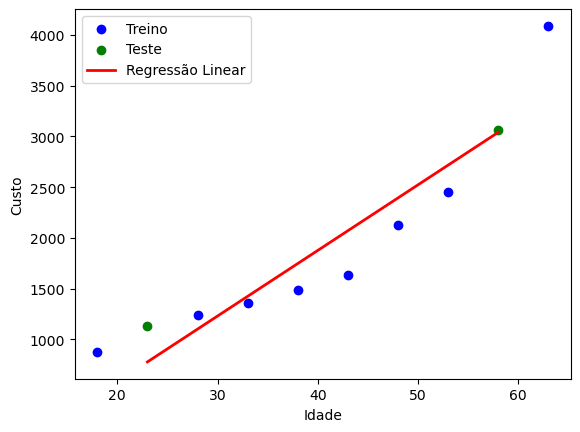

In [34]:
plt.scatter(X_train, y_train, color='blue', label='Treino')
plt.scatter(X_test, y_test, color='green', label='Teste')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('Idade')
plt.ylabel('Custo')
plt.legend()
plt.show()